In [1]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
from TargetDistributions.DoubleWell import ManyWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.train import LearntDistributionManager
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well
torch.set_default_dtype(torch.float64)

In [3]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [4]:
target = ManyWellEnergy(a=-0.5, b=-6)

# alpha=2 divergence

In [5]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 4
epochs = int(2e4)
n_samples_estimation = int(1e5)
batch_size = int(1e3)
lr = 2e-5
train_prior = False
weight_decay = 1e-6
clip_grad_norm = False
optimizer = "Adam"
flow_type = "RealNVP"
loss_type = "DReG"
initial_flow_scaling = 1.5
n_flow_steps = 64
annealing = True
n_plots = 20
flow_kwargs = {"use_exp": False}

In [7]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type, **flow_kwargs)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing, weight_decay=weight_decay)
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(info_before["effective_sample_size"]/n_samples_estimation)

tensor(0.0128)


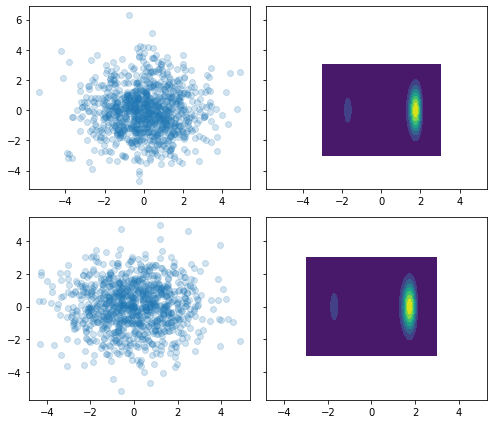

In [8]:
plotter(tester)

loss: -15.528365666521434, mean log p_x -7.536857279381536:   0%|          | 0/10000 [00:00<?, ?it/s]

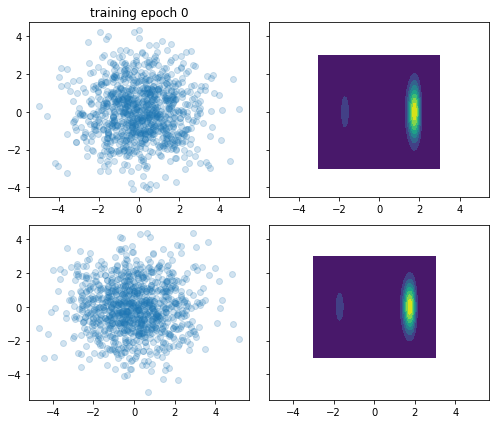

loss: -21.06233901304437, mean log p_x -7.721882568971023:   5%|▌         | 500/10000 [01:43<30:06,  5.26it/s]  

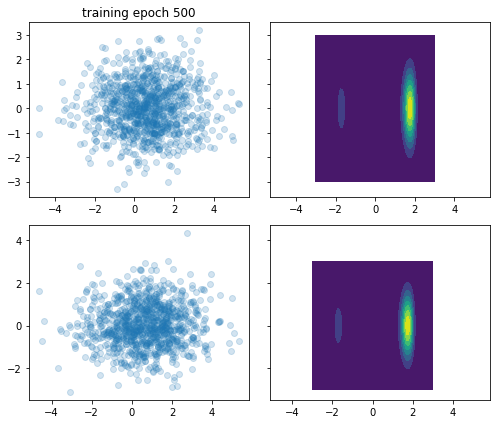

loss: -21.06233901304437, mean log p_x -7.721882568971023:   5%|▌         | 502/10000 [01:44<50:06,  3.16it/s]

ESS is 0.02662309515891575


loss: -21.790711191589658, mean log p_x -7.682310959348497:  10%|█         | 1000/10000 [03:44<36:36,  4.10it/s]

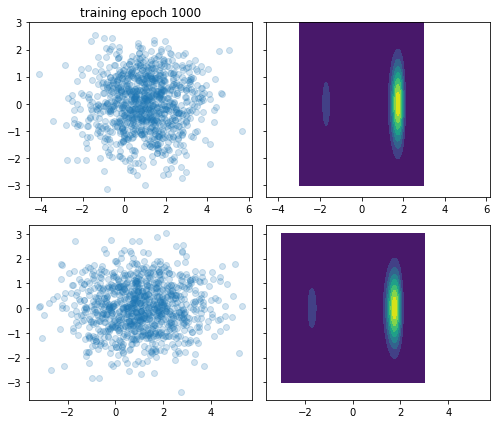

loss: -21.790711191589658, mean log p_x -7.682310959348497:  10%|█         | 1001/10000 [03:45<1:14:08,  2.02it/s]

ESS is 0.033464610567059176


loss: -21.412423285756567, mean log p_x -11.869355057413042:  15%|█▌        | 1500/10000 [05:49<35:04,  4.04it/s] 

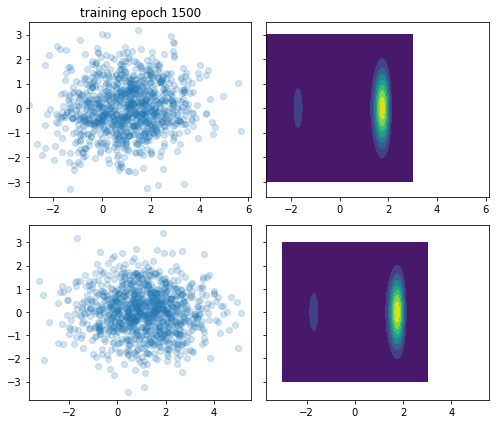

loss: -21.412423285756567, mean log p_x -11.869355057413042:  15%|█▌        | 1501/10000 [05:49<1:04:52,  2.18it/s]

ESS is 0.037142937933229814


loss: -21.396236068106557, mean log p_x -16.934503869323244:  20%|██        | 2000/10000 [07:53<34:41,  3.84it/s]  

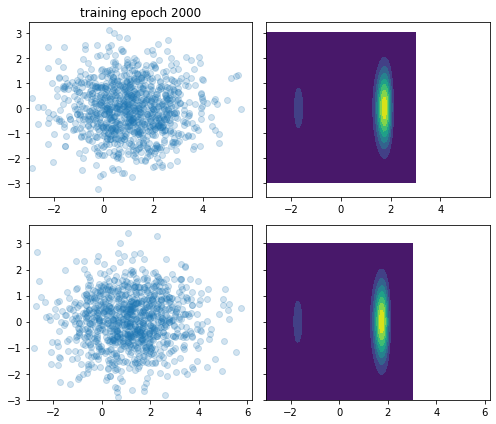

loss: -21.396236068106557, mean log p_x -16.934503869323244:  20%|██        | 2001/10000 [07:54<1:02:25,  2.14it/s]

ESS is 0.039381681913319554


loss: -21.616179022311513, mean log p_x -15.785962690087727:  25%|██▌       | 2500/10000 [09:59<35:25,  3.53it/s]  

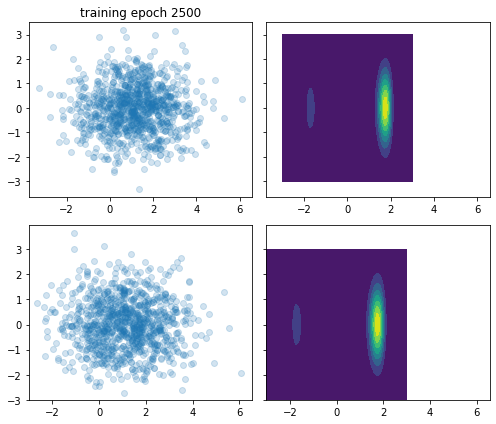

loss: -21.616179022311513, mean log p_x -15.785962690087727:  25%|██▌       | 2501/10000 [10:00<1:02:34,  2.00it/s]

ESS is 0.04087345005028921


loss: -21.287648180028558, mean log p_x -17.589710950797095:  30%|███       | 3000/10000 [12:05<29:08,  4.00it/s]  

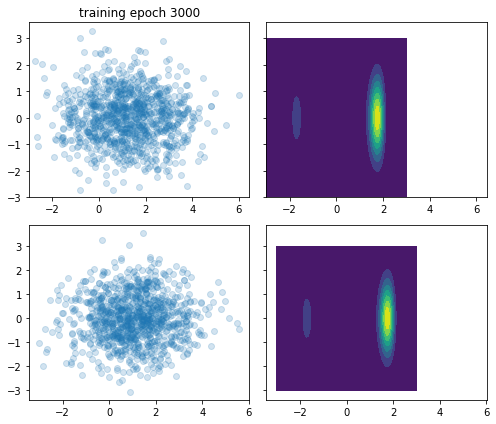

loss: -21.287648180028558, mean log p_x -17.589710950797095:  30%|███       | 3001/10000 [12:05<53:08,  2.20it/s]

ESS is 0.04215405753404311


loss: -21.59653187645754, mean log p_x -8.966856307806328:  35%|███▌      | 3500/10000 [14:08<22:36,  4.79it/s]  

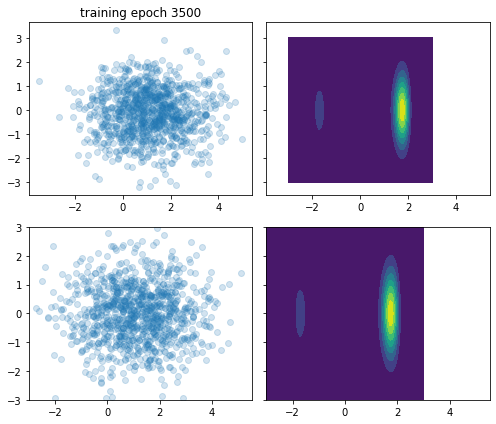

loss: -21.59653187645754, mean log p_x -8.966856307806328:  35%|███▌      | 3501/10000 [14:08<41:40,  2.60it/s]

ESS is 0.04286543588527818


loss: -21.071985523326322, mean log p_x -15.35976935386381:  40%|████      | 4000/10000 [16:12<24:21,  4.11it/s] 

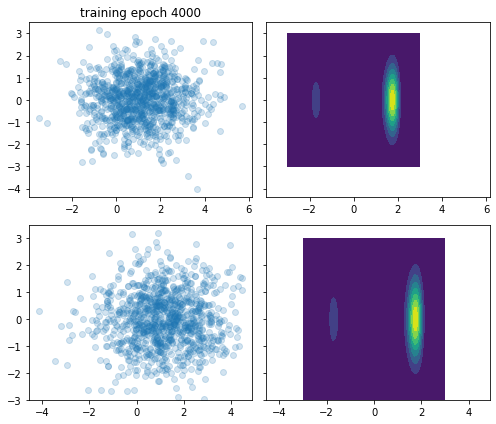

loss: -21.071985523326322, mean log p_x -15.35976935386381:  40%|████      | 4001/10000 [16:13<49:25,  2.02it/s]

ESS is 0.04344504555535146


loss: -21.429925461231868, mean log p_x -10.24985977827707:  45%|████▌     | 4500/10000 [18:18<22:11,  4.13it/s] 

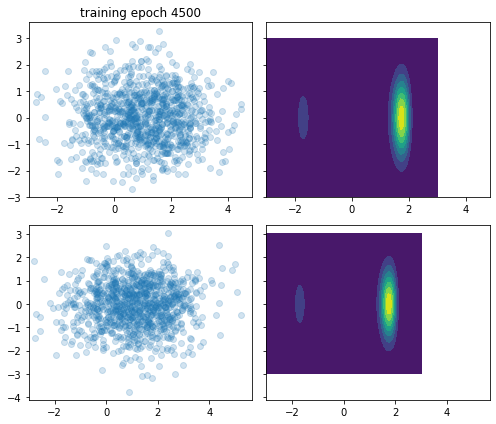

loss: -21.429925461231868, mean log p_x -10.24985977827707:  45%|████▌     | 4501/10000 [18:19<42:41,  2.15it/s]

ESS is 0.043921143511400494


loss: -21.85137459029815, mean log p_x -8.504191512464102:  50%|█████     | 5000/10000 [20:21<20:00,  4.17it/s]  

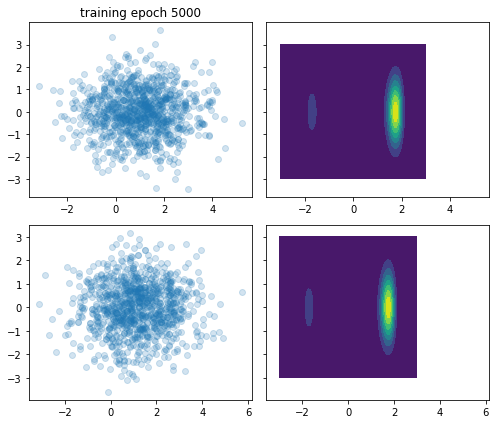

loss: -21.85137459029815, mean log p_x -8.504191512464102:  50%|█████     | 5001/10000 [20:22<39:57,  2.08it/s]

ESS is 0.044317658076198786


loss: -20.53443063109215, mean log p_x -4.828597785000294:  55%|█████▌    | 5500/10000 [22:19<17:31,  4.28it/s] 

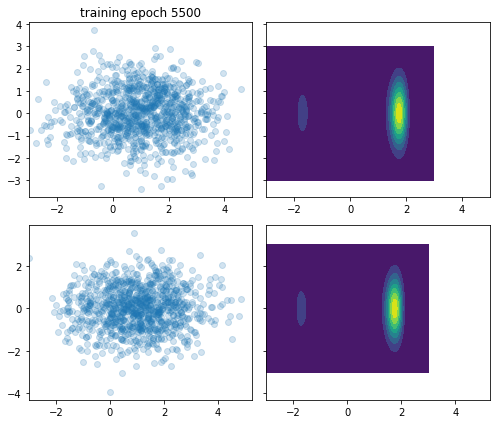

loss: -20.53443063109215, mean log p_x -4.828597785000294:  55%|█████▌    | 5501/10000 [22:20<34:34,  2.17it/s]

ESS is 0.04488606935772151


loss: -21.611994234815413, mean log p_x -2.974356595817399:  60%|██████    | 6000/10000 [24:23<16:35,  4.02it/s] 

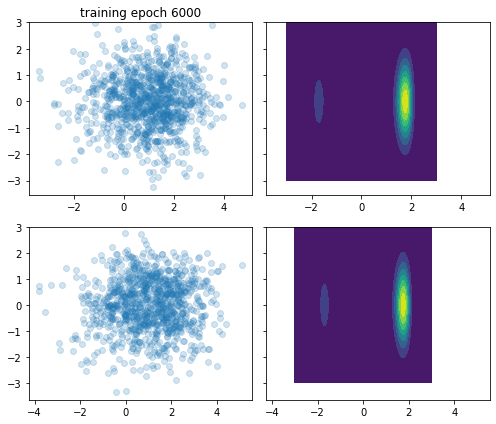

loss: -21.611994234815413, mean log p_x -2.974356595817399:  60%|██████    | 6001/10000 [24:23<29:56,  2.23it/s]

ESS is 0.04543806951534724


loss: -21.600847084765014, mean log p_x -2.5760295710453804:  65%|██████▌   | 6500/10000 [26:26<13:17,  4.39it/s]

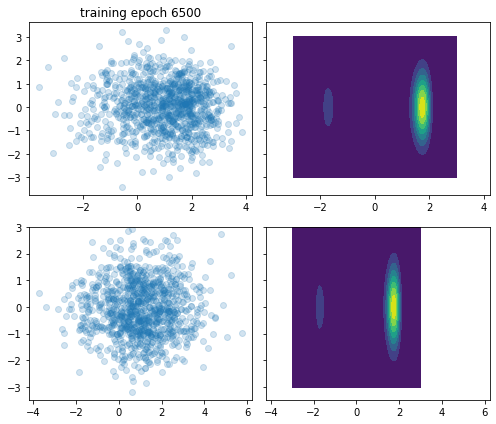

loss: -21.600847084765014, mean log p_x -2.5760295710453804:  65%|██████▌   | 6501/10000 [26:27<26:35,  2.19it/s]

ESS is 0.04618974139867581


loss: -22.089594198891703, mean log p_x 2.2540926639550007:  70%|███████   | 7000/10000 [28:29<11:30,  4.34it/s] 

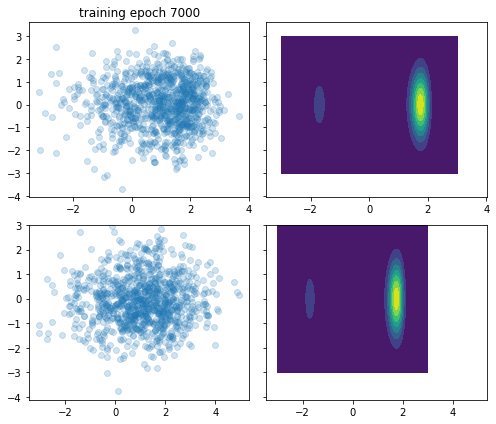

loss: -22.089594198891703, mean log p_x 2.2540926639550007:  70%|███████   | 7001/10000 [28:30<21:44,  2.30it/s]

ESS is 0.047349859264439735


loss: -21.20757731869383, mean log p_x 1.9652961608052346:  75%|███████▌  | 7500/10000 [30:31<09:27,  4.40it/s]  

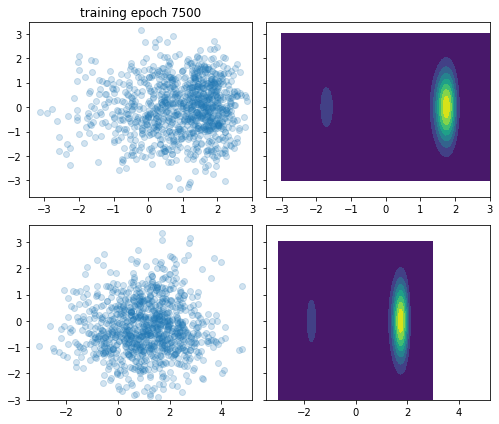

loss: -21.20757731869383, mean log p_x 1.9652961608052346:  75%|███████▌  | 7501/10000 [30:32<19:15,  2.16it/s]

ESS is 0.04886253147284492


loss: -22.179624843040898, mean log p_x 4.345018724510746:  80%|████████  | 8000/10000 [32:34<08:11,  4.07it/s]  

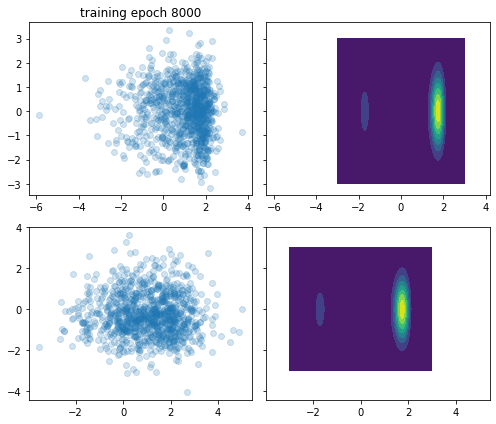

loss: -22.179624843040898, mean log p_x 4.345018724510746:  80%|████████  | 8001/10000 [32:35<14:39,  2.27it/s]

ESS is 0.05107699440196966


loss: -21.85321475186126, mean log p_x 3.457814915486833:  85%|████████▌ | 8500/10000 [34:34<05:53,  4.24it/s]  

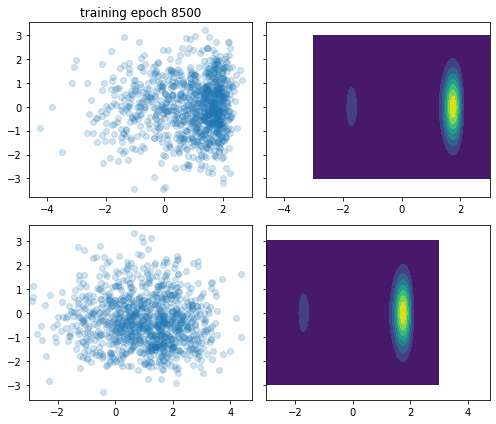

loss: -21.85321475186126, mean log p_x 3.457814915486833:  85%|████████▌ | 8501/10000 [34:35<11:02,  2.26it/s]

ESS is 0.05384958386350224


loss: -21.79676400178718, mean log p_x 4.531219326153359:  90%|█████████ | 9000/10000 [36:33<03:57,  4.22it/s]  

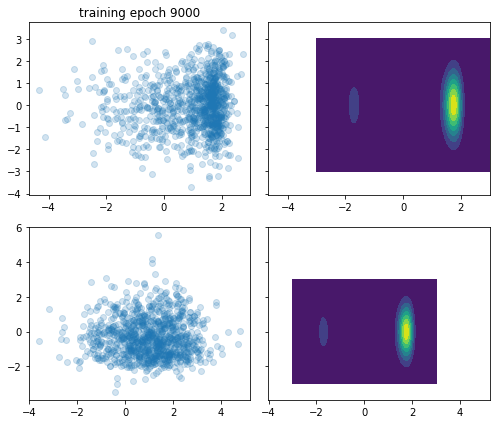

loss: -21.79676400178718, mean log p_x 4.531219326153359:  90%|█████████ | 9001/10000 [36:34<07:07,  2.33it/s]

ESS is 0.05654765104443129


loss: -21.15706204795375, mean log p_x 5.909793824139271:  95%|█████████▌| 9500/10000 [38:11<01:29,  5.59it/s] 

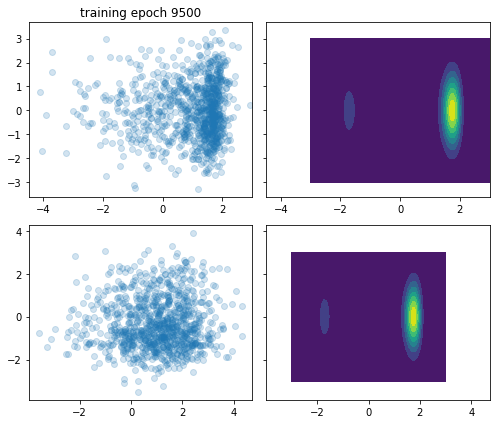

loss: -21.15706204795375, mean log p_x 5.909793824139271:  95%|█████████▌| 9502/10000 [38:12<02:34,  3.22it/s]

ESS is 0.05872847481769842


loss: -21.612292117590194, mean log p_x 6.80560039507112: 100%|██████████| 10000/10000 [39:42<00:00,  4.20it/s]


In [9]:
history = tester.train(int(1e4), batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)

In [10]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 23.44797813943399 
estimate after training is 23.48272642170248 
effective sample size before is 0.012831623814753843
effective sample size after train is 0.13313590449943702
variance in weights is 6.511186952065781e-10


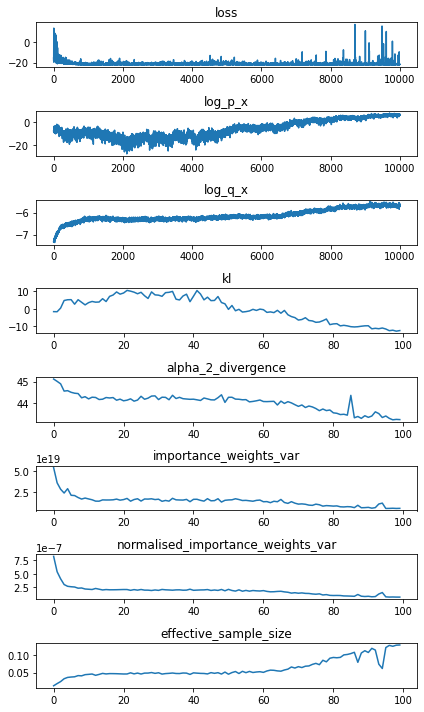

In [11]:
plot_history(history)

loss: -21.92506961216523, mean log p_x 6.245379940163032:   0%|          | 0/20000 [00:00<?, ?it/s]

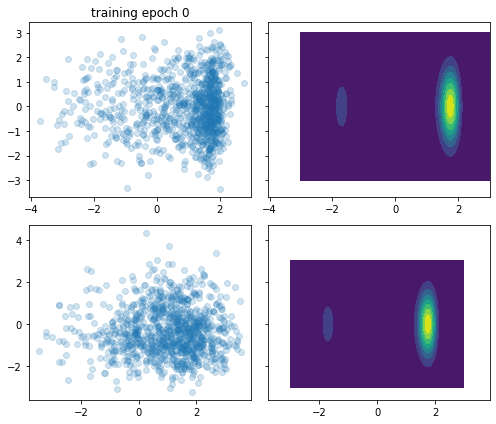

loss: -21.53082462566845, mean log p_x 8.704728795633022:   5%|▌         | 1000/20000 [03:09<58:58,  5.37it/s]   

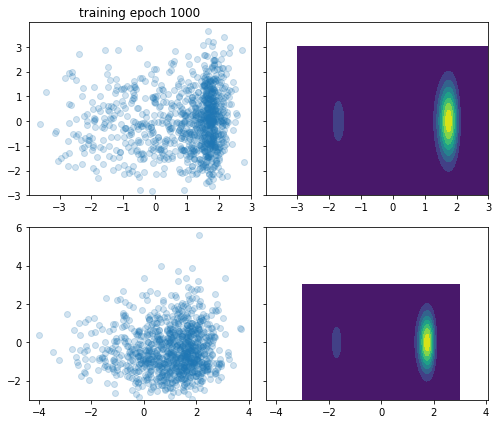

loss: -21.53082462566845, mean log p_x 8.704728795633022:   5%|▌         | 1002/20000 [03:10<1:42:26,  3.09it/s]

ESS is 0.13903075311830457


loss: -21.103267822718077, mean log p_x 9.710368996996966:  10%|█         | 2000/20000 [06:46<1:12:05,  4.16it/s]

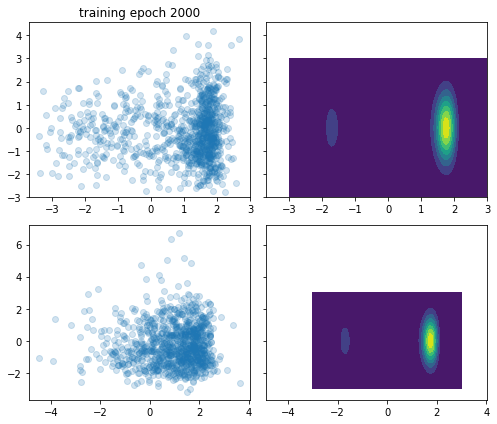

loss: -21.103267822718077, mean log p_x 9.710368996996966:  10%|█         | 2001/20000 [06:47<2:22:17,  2.11it/s]

ESS is 0.15204753209103403


loss: -21.53124541244628, mean log p_x 9.985269878199725:  15%|█▌        | 3000/20000 [10:33<1:05:24,  4.33it/s]  

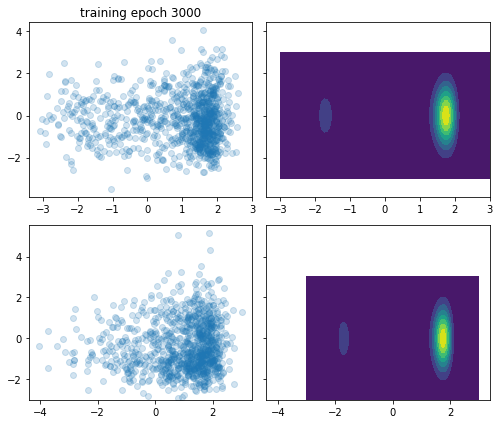

loss: -21.53124541244628, mean log p_x 9.985269878199725:  15%|█▌        | 3001/20000 [10:33<1:58:42,  2.39it/s]

ESS is 0.16283558092053124


loss: -21.55304155576738, mean log p_x 10.885634530900239:  20%|██        | 4000/20000 [14:25<1:01:03,  4.37it/s] 

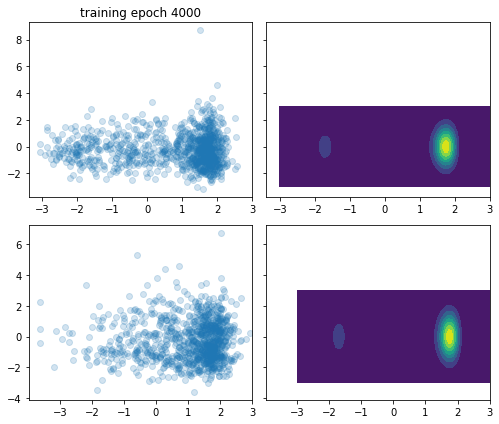

loss: -21.55304155576738, mean log p_x 10.885634530900239:  20%|██        | 4001/20000 [14:25<1:58:25,  2.25it/s]

ESS is 0.17380055397053018


loss: -21.572984542176428, mean log p_x 10.81249780908895:  25%|██▌       | 5000/20000 [18:17<56:17,  4.44it/s]   

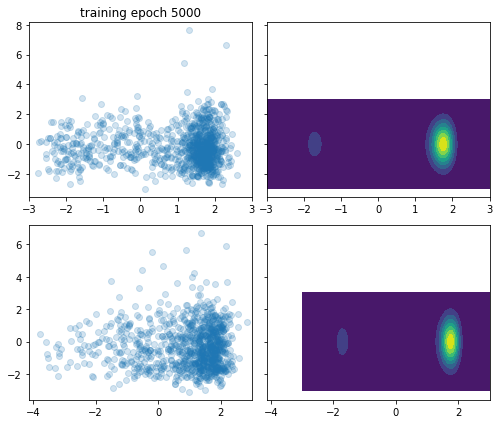

loss: -21.572984542176428, mean log p_x 10.81249780908895:  25%|██▌       | 5001/20000 [18:17<1:50:21,  2.27it/s]

ESS is 0.18338262463636734


loss: -21.626516875855028, mean log p_x 11.42800612046233:  30%|███       | 6000/20000 [22:10<59:47,  3.90it/s]   

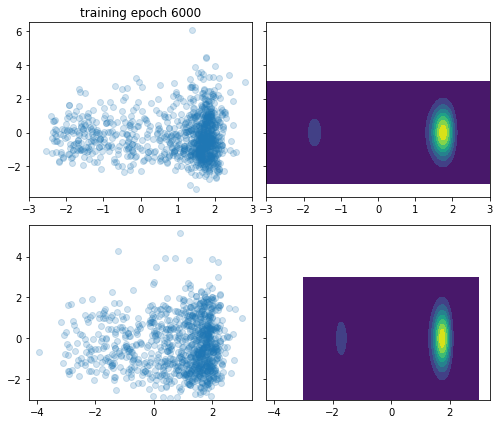

loss: -21.626516875855028, mean log p_x 11.42800612046233:  30%|███       | 6001/20000 [22:11<1:47:43,  2.17it/s]

ESS is 0.19602562720813788


loss: -21.40906878613118, mean log p_x 11.573203582188178:  35%|███▌      | 7000/20000 [25:51<37:23,  5.79it/s]   

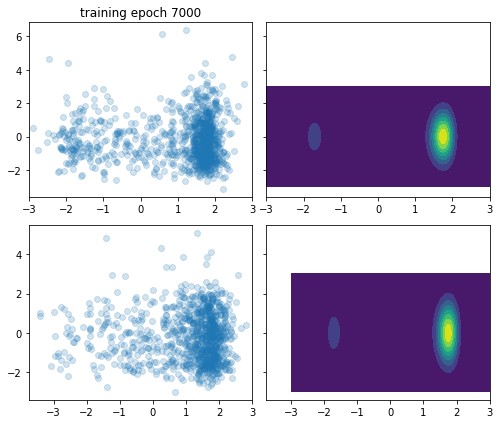

loss: -21.40906878613118, mean log p_x 11.573203582188178:  35%|███▌      | 7002/20000 [25:51<1:03:27,  3.41it/s]

ESS is 0.20311062374140515


loss: -21.518477592228237, mean log p_x 12.155638094313575:  40%|████      | 8000/20000 [29:03<39:05,  5.12it/s] 

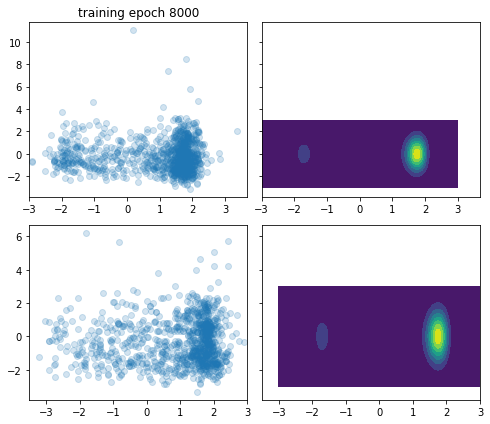

loss: -21.518477592228237, mean log p_x 12.155638094313575:  40%|████      | 8002/20000 [29:04<1:05:25,  3.06it/s]

ESS is 0.20936726187319651


loss: -21.488555835634504, mean log p_x 11.996302290633299:  45%|████▌     | 9000/20000 [32:13<34:04,  5.38it/s]  

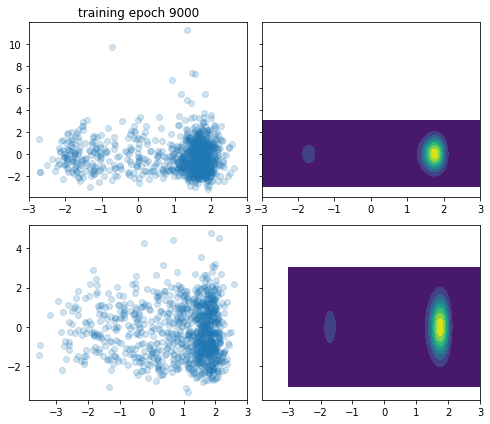

loss: -21.488555835634504, mean log p_x 11.996302290633299:  45%|████▌     | 9002/20000 [32:14<58:27,  3.14it/s]  

ESS is 0.22067642264500562


loss: -15.357018199515347, mean log p_x 12.368945335718754:  50%|█████     | 10000/20000 [35:47<37:52,  4.40it/s]

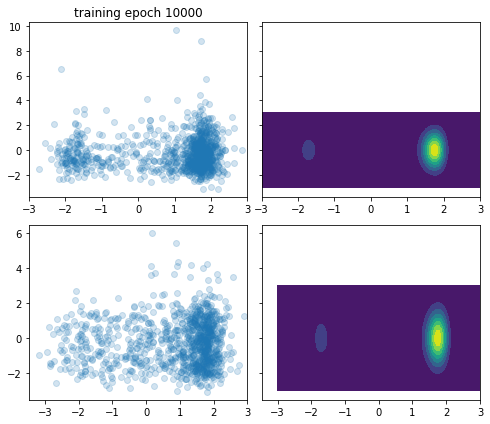

loss: -15.357018199515347, mean log p_x 12.368945335718754:  50%|█████     | 10001/20000 [35:48<1:11:51,  2.32it/s]

ESS is 0.22886554984745544


loss: -21.46246914648362, mean log p_x 12.67905425730331:  55%|█████▌    | 11000/20000 [39:42<34:11,  4.39it/s]    

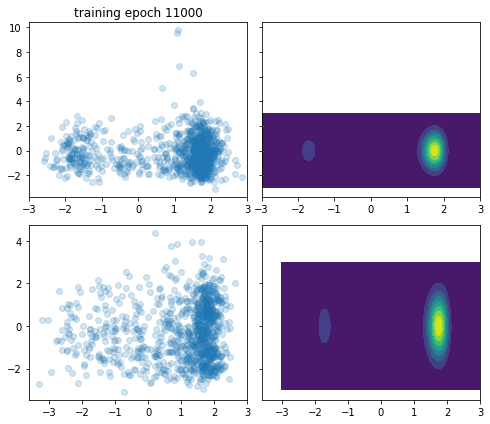

loss: -21.46246914648362, mean log p_x 12.67905425730331:  55%|█████▌    | 11001/20000 [39:43<1:04:54,  2.31it/s]

ESS is 0.23495662222508074


loss: -21.477422141161618, mean log p_x 12.733870451910873:  60%|██████    | 12000/20000 [43:35<31:55,  4.18it/s]

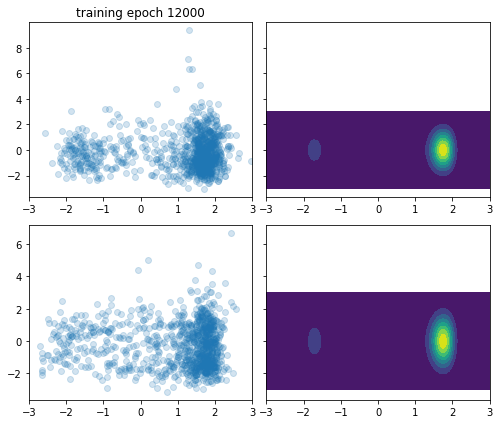

loss: -21.477422141161618, mean log p_x 12.733870451910873:  60%|██████    | 12001/20000 [43:36<1:00:48,  2.19it/s]

ESS is 0.24153240912128296


loss: -21.407725531798185, mean log p_x 12.548044006131235:  65%|██████▌   | 13000/20000 [47:27<26:31,  4.40it/s]  

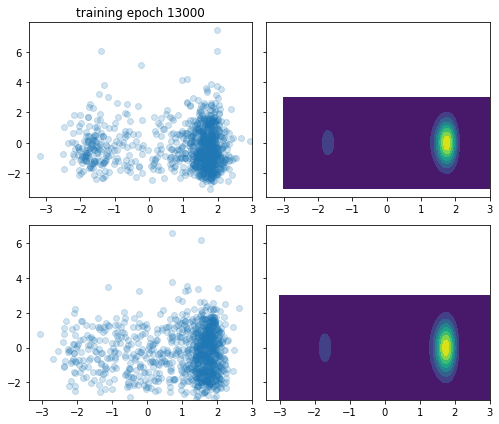

loss: -21.407725531798185, mean log p_x 12.548044006131235:  65%|██████▌   | 13001/20000 [47:28<49:13,  2.37it/s]

ESS is 0.25048164006022905


loss: -21.411782480726874, mean log p_x 12.807842144427903:  70%|███████   | 14000/20000 [51:17<24:05,  4.15it/s]

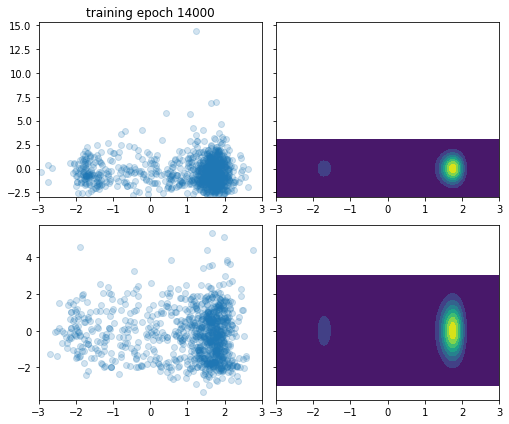

loss: -21.411782480726874, mean log p_x 12.807842144427903:  70%|███████   | 14001/20000 [51:17<45:42,  2.19it/s]

ESS is 0.2543954788989264


loss: -21.4141931574319, mean log p_x 12.987965732856756:  75%|███████▌  | 15000/20000 [55:07<18:17,  4.56it/s]  

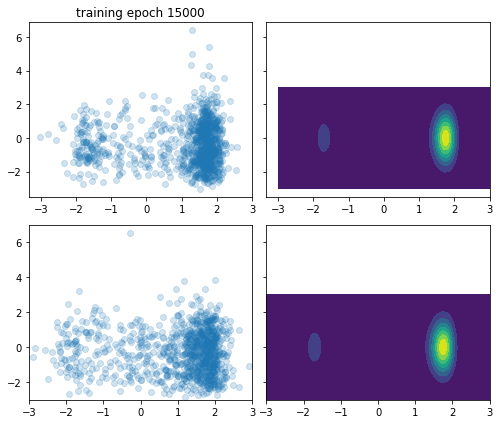

loss: -21.4141931574319, mean log p_x 12.987965732856756:  75%|███████▌  | 15001/20000 [55:08<34:12,  2.44it/s]

ESS is 0.25701118697096353


loss: -21.34940646027632, mean log p_x 13.258550779501668:  80%|████████  | 16000/20000 [59:00<15:52,  4.20it/s] 

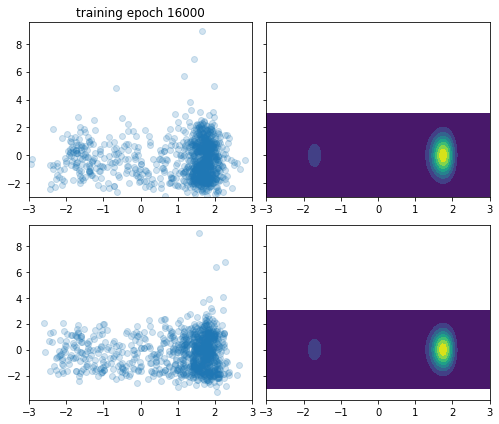

loss: -21.34940646027632, mean log p_x 13.258550779501668:  80%|████████  | 16001/20000 [59:00<30:46,  2.17it/s]

ESS is 0.26638788405399766


loss: -21.270427444537102, mean log p_x 13.293922663191749:  85%|████████▌ | 17000/20000 [1:02:52<13:04,  3.82it/s]

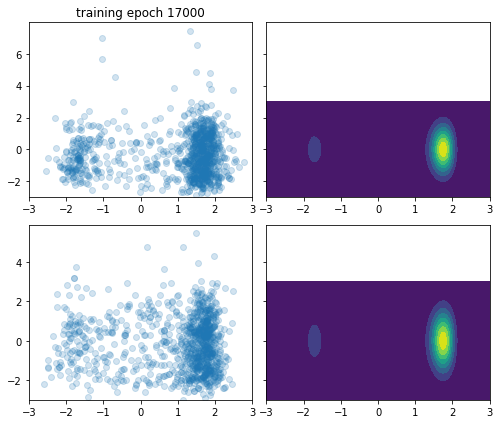

loss: -21.270427444537102, mean log p_x 13.293922663191749:  85%|████████▌ | 17001/20000 [1:02:53<23:36,  2.12it/s]

ESS is 0.2744288597356398


loss: -21.31053437420676, mean log p_x 13.40067025797575:  90%|█████████ | 18000/20000 [1:06:44<07:50,  4.25it/s]  

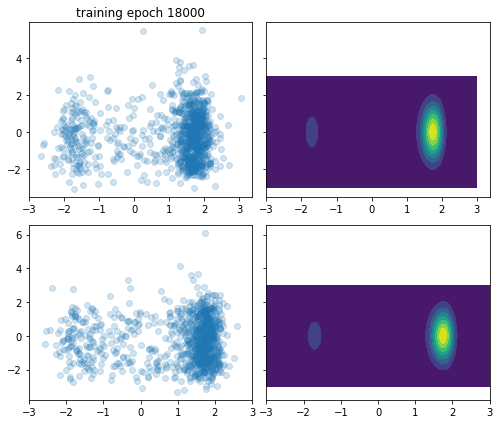

loss: -21.31053437420676, mean log p_x 13.40067025797575:  90%|█████████ | 18001/20000 [1:06:44<14:18,  2.33it/s]

ESS is 0.27894300336632877


loss: -21.299303645660807, mean log p_x 13.879716427206372:  95%|█████████▌| 19000/20000 [1:09:56<03:24,  4.89it/s]

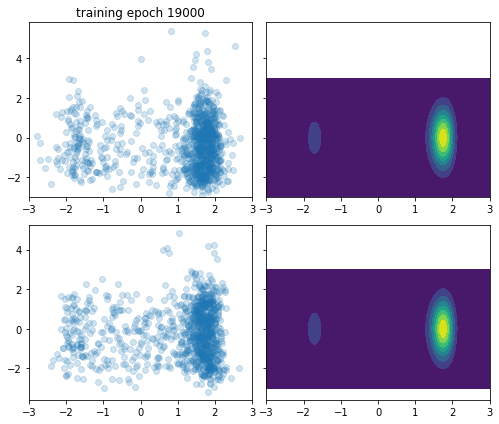

loss: -21.299303645660807, mean log p_x 13.879716427206372:  95%|█████████▌| 19002/20000 [1:09:56<05:17,  3.15it/s]

ESS is 0.28778721852916506


loss: -21.248462244157356, mean log p_x 13.412753369965333: 100%|██████████| 20000/20000 [1:13:04<00:00,  4.56it/s]


In [12]:
history = tester.train(int(2e4), batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)

In [13]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

estimate before training is 23.44797813943399 
estimate after training is 23.467751905013287 
effective sample size before is 0.012831623814753843
effective sample size after train is 0.3472596912640762
variance in weights is 1.8797080473929624e-10


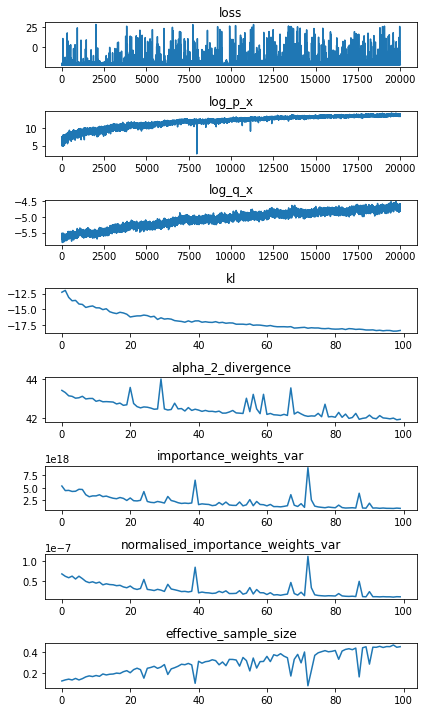

In [14]:
plot_history(history)

loss: -21.260814023137126, mean log p_x 13.771808604419066:   0%|          | 0/20000 [00:00<?, ?it/s]

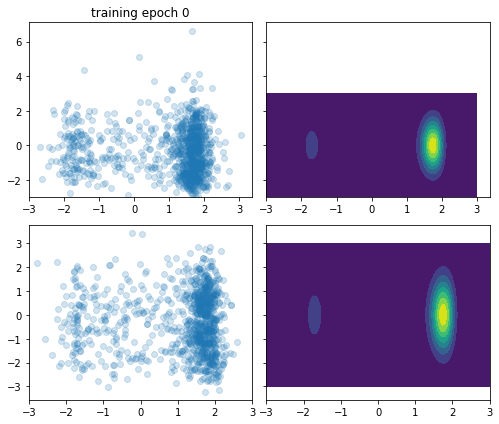

loss: -21.21208897179116, mean log p_x 13.779915317158826:   5%|▌         | 1000/20000 [03:13<58:34,  5.41it/s]  

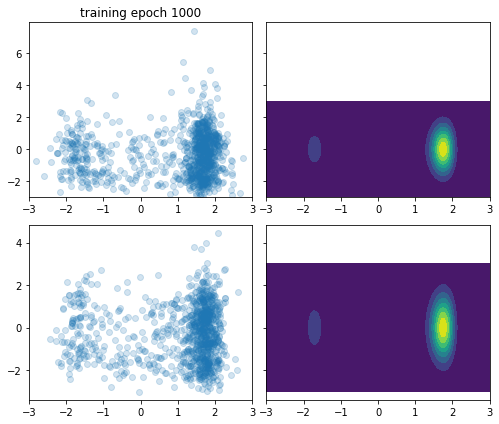

loss: -21.21208897179116, mean log p_x 13.779915317158826:   5%|▌         | 1002/20000 [03:13<1:36:01,  3.30it/s]

ESS is 0.4294825986827738


loss: -21.187788588963674, mean log p_x 13.642788982504172:  10%|█         | 2000/20000 [06:24<55:04,  5.45it/s]  

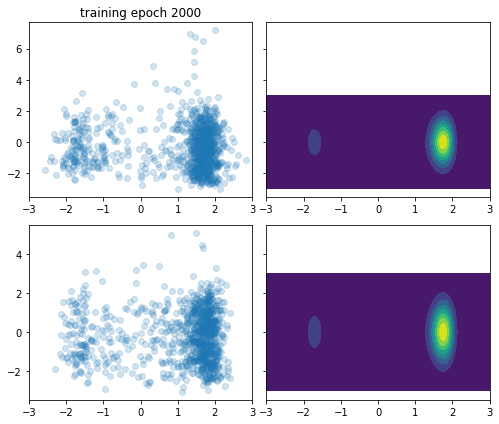

loss: -21.187788588963674, mean log p_x 13.642788982504172:  10%|█         | 2002/20000 [06:25<1:34:58,  3.16it/s]

ESS is 0.458318587328108


loss: -21.199230969001363, mean log p_x 13.73786697582996:  15%|█▌        | 3000/20000 [09:32<51:19,  5.52it/s]   

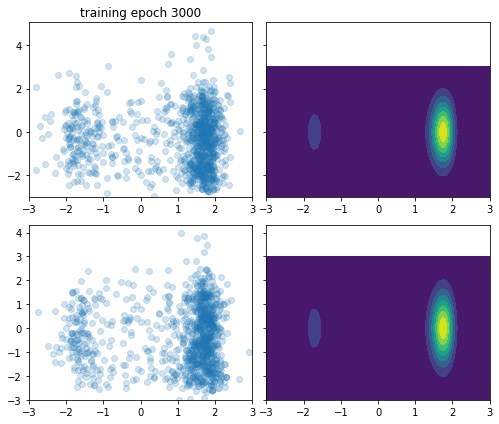

loss: -21.199230969001363, mean log p_x 13.73786697582996:  15%|█▌        | 3002/20000 [09:33<1:25:31,  3.31it/s]

ESS is 0.4693400462975049


loss: -21.16027736985428, mean log p_x 13.939001264946851:  20%|██        | 4000/20000 [12:38<49:24,  5.40it/s]   

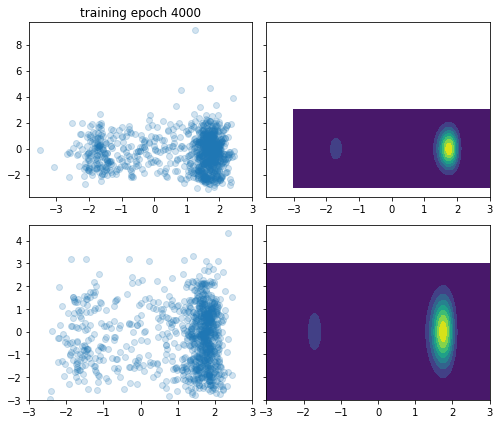

loss: -21.16027736985428, mean log p_x 13.939001264946851:  20%|██        | 4002/20000 [12:39<1:22:37,  3.23it/s]

ESS is 0.47465812603191865


loss: -21.168479320239285, mean log p_x 14.132209557500707:  25%|██▌       | 5000/20000 [16:19<56:27,  4.43it/s]  

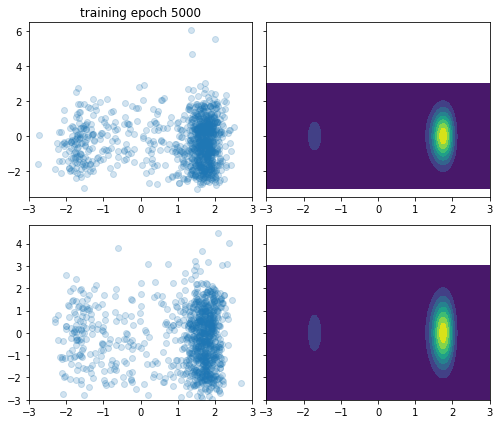

loss: -21.168479320239285, mean log p_x 14.132209557500707:  25%|██▌       | 5001/20000 [16:20<1:44:20,  2.40it/s]

ESS is 0.4710551988733852


loss: -21.15783519949617, mean log p_x 14.245317303304112:  30%|███       | 6000/20000 [20:06<50:50,  4.59it/s]   

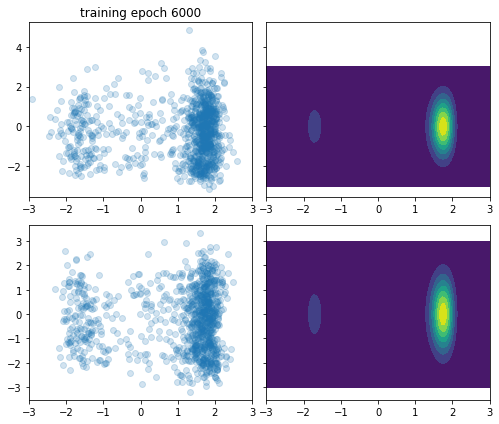

loss: -21.15783519949617, mean log p_x 14.245317303304112:  30%|███       | 6001/20000 [20:07<1:40:47,  2.31it/s]

ESS is 0.4778779446162034


loss: -21.15043201056617, mean log p_x 13.965566736730777:  35%|███▌      | 7000/20000 [23:53<50:54,  4.26it/s]   

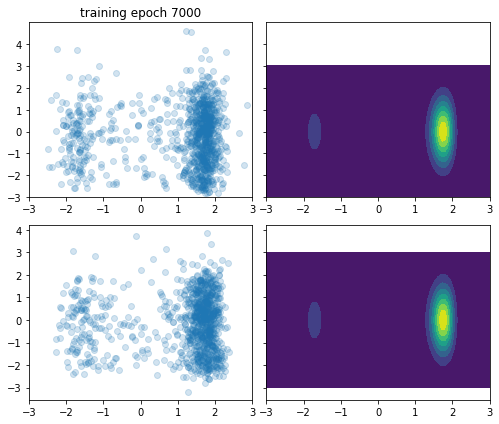

loss: -21.15043201056617, mean log p_x 13.965566736730777:  35%|███▌      | 7001/20000 [23:54<1:34:32,  2.29it/s]

ESS is 0.48302655465911304


loss: -21.11930915699908, mean log p_x 14.305490502876305:  40%|████      | 8000/20000 [27:39<44:20,  4.51it/s]  

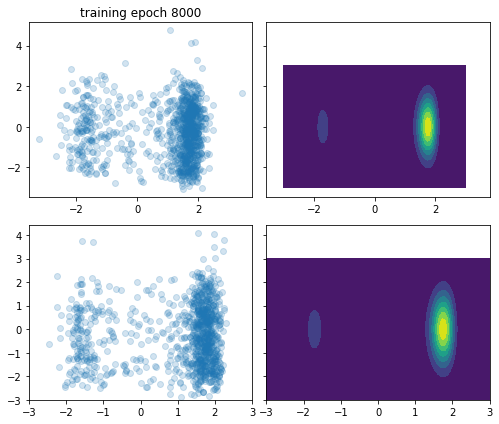

loss: -21.11930915699908, mean log p_x 14.305490502876305:  40%|████      | 8001/20000 [27:40<1:20:27,  2.49it/s]

ESS is 0.4890887261585894


loss: -21.1011821419458, mean log p_x 14.364273032493431:  45%|████▌     | 9000/20000 [31:23<40:33,  4.52it/s]   

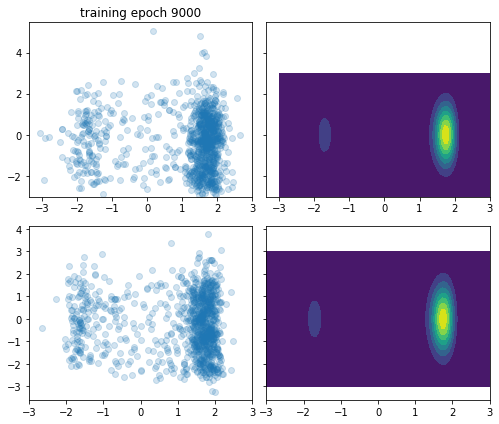

loss: -21.1011821419458, mean log p_x 14.364273032493431:  45%|████▌     | 9001/20000 [31:24<1:18:17,  2.34it/s]

ESS is 0.49554916326556986


loss: -21.068858533888942, mean log p_x 14.53213106481671:  50%|█████     | 10000/20000 [35:07<36:58,  4.51it/s] 

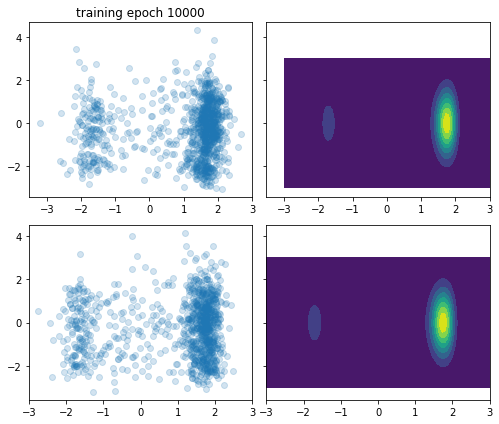

loss: -21.068858533888942, mean log p_x 14.53213106481671:  50%|█████     | 10001/20000 [35:08<1:07:48,  2.46it/s]

ESS is 0.4964504278033857


loss: -21.049057731399, mean log p_x 14.58928099910396:  55%|█████▌    | 11000/20000 [38:56<35:29,  4.23it/s]     

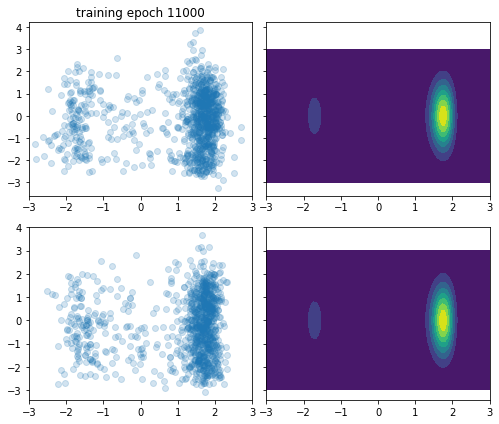

loss: -21.049057731399, mean log p_x 14.58928099910396:  55%|█████▌    | 11001/20000 [38:56<1:07:24,  2.23it/s]

ESS is 0.49926126304280644


loss: -21.037727239809403, mean log p_x 14.666056689333615:  60%|██████    | 12000/20000 [42:43<28:47,  4.63it/s]

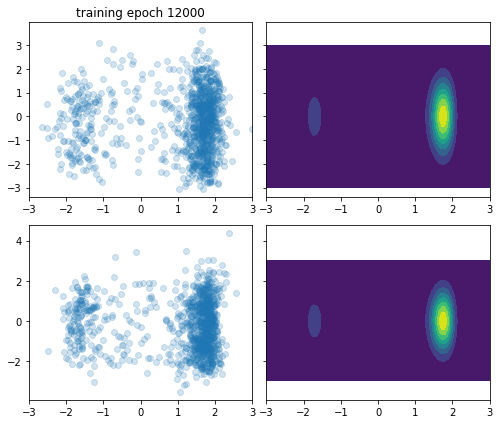

loss: -21.037727239809403, mean log p_x 14.666056689333615:  60%|██████    | 12001/20000 [42:43<55:33,  2.40it/s]

ESS is 0.49661931338525145


loss: -21.06106740722363, mean log p_x 14.517143839967796:  65%|██████▌   | 13000/20000 [46:31<27:45,  4.20it/s] 

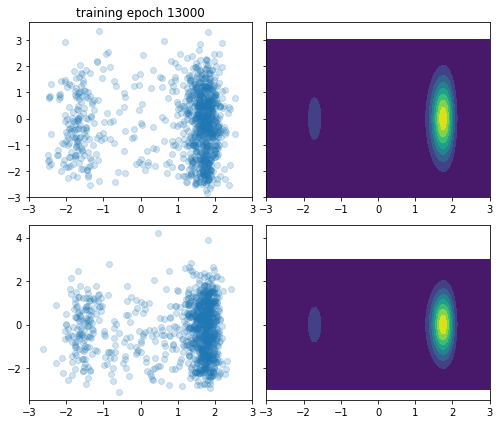

loss: -21.06106740722363, mean log p_x 14.517143839967796:  65%|██████▌   | 13001/20000 [46:31<54:05,  2.16it/s]

ESS is 0.5037898664373323


loss: -21.07031596197707, mean log p_x 14.514584699330033:  70%|███████   | 14000/20000 [50:23<22:49,  4.38it/s] 

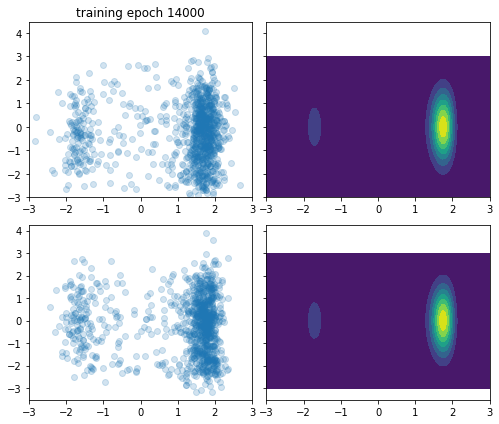

loss: -21.07031596197707, mean log p_x 14.514584699330033:  70%|███████   | 14001/20000 [50:23<42:17,  2.36it/s]

ESS is 0.5099575637356942


loss: -21.036907531492794, mean log p_x 14.723785324238937:  75%|███████▌  | 15000/20000 [54:03<20:34,  4.05it/s]

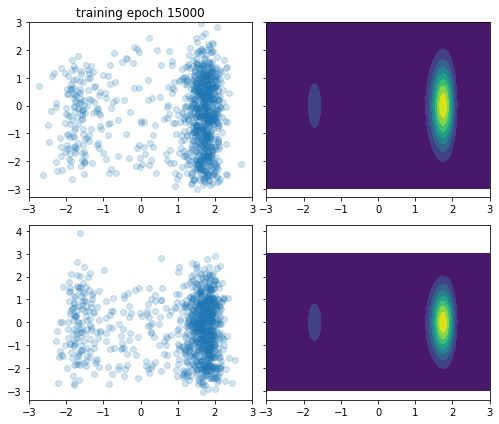

loss: -21.036907531492794, mean log p_x 14.723785324238937:  75%|███████▌  | 15001/20000 [54:04<38:31,  2.16it/s]

ESS is 0.515978515881216


loss: -21.019998680490364, mean log p_x 14.703711983060902:  80%|████████  | 16000/20000 [57:19<12:25,  5.36it/s]

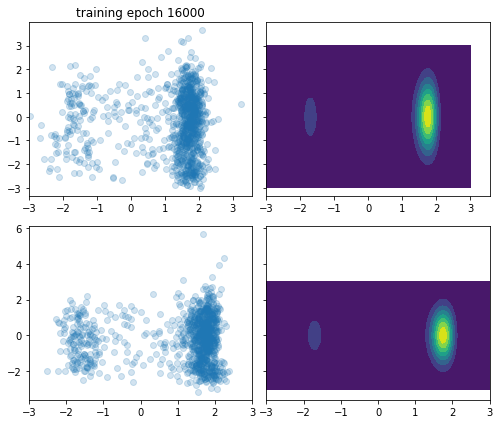

loss: -21.019998680490364, mean log p_x 14.703711983060902:  80%|████████  | 16002/20000 [57:20<20:22,  3.27it/s]

ESS is 0.5220291017416349


loss: -21.02753414430358, mean log p_x 14.700354169888394:  85%|████████▌ | 17000/20000 [1:00:34<09:08,  5.47it/s] 

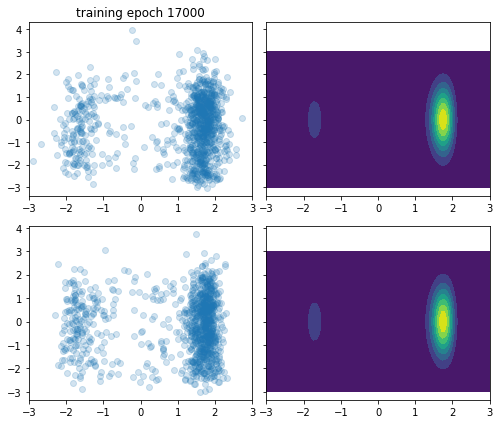

loss: -21.02753414430358, mean log p_x 14.700354169888394:  85%|████████▌ | 17001/20000 [1:00:35<19:07,  2.61it/s]

ESS is 0.5260524416852601


loss: -20.985212704837608, mean log p_x 14.989166163444033:  90%|█████████ | 18000/20000 [1:03:43<06:12,  5.37it/s]

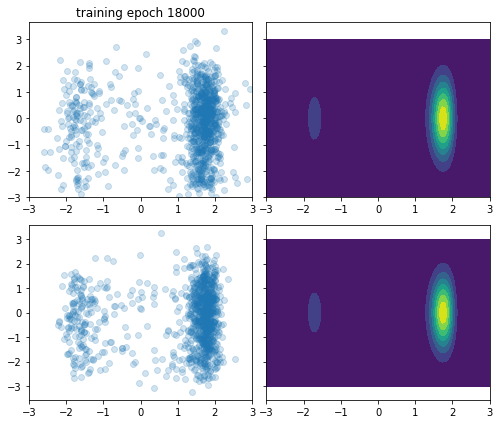

loss: -20.985212704837608, mean log p_x 14.989166163444033:  90%|█████████ | 18002/20000 [1:03:44<10:16,  3.24it/s]

ESS is 0.5311223513996767


loss: -20.986268660213163, mean log p_x 15.128252637649796:  95%|█████████▌| 19000/20000 [1:06:54<03:05,  5.39it/s]

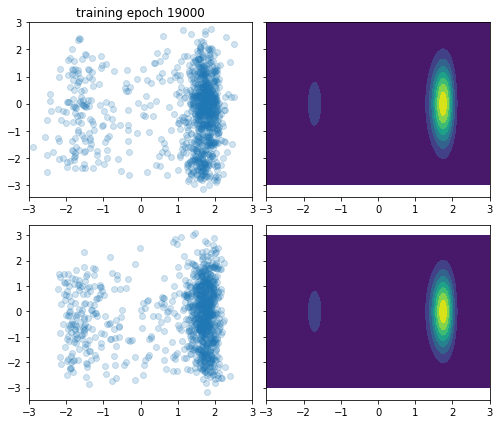

loss: -20.986268660213163, mean log p_x 15.128252637649796:  95%|█████████▌| 19002/20000 [1:06:55<05:10,  3.21it/s]

ESS is 0.5363215437043335


loss: -20.974214708560133, mean log p_x 14.891094358572445: 100%|██████████| 20000/20000 [1:10:01<00:00,  4.76it/s]


In [15]:
history = tester.train(int(2e4), batch_size=batch_size, clip_grad_norm=clip_grad_norm, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)

In [1]:
expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)

print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

NameError: name 'tester' is not defined

In [ ]:
plot_history(history)